In [1]:
import numpy as np
import matplotlib.pyplot as plot

from IPython.display import display, clear_output
import ipywidgets as widgets
from ipywidgets import interact, interactive

from moviepy.editor import VideoClip

from wmse import *
from wmse_sequence import WMSESequencialModel, WMSESequencialModelBuilder

In [2]:
model = WMSESequencialModel(WMSESequencialModelBuilder(3.0).add_pike(10)
                                                           .add_pike(10)
                                                           .add_pike(10)
                                                           .add_pike(10)
                                                           .add_connection(1, 2, 5, 1.0, 3.0, 1)
                                                           .add_connection(2, 2, 5, 1.0, 3.0, 1)
                                                           .add_connection(3, 2, 5, 1.0, 3.0, 1)
                           )

In [3]:
def see_map(t):
    fig = plot.figure(figsize=(6, 6), )
    ax = model.visualize(t, False)
    plot.title('temperature = %.3f' % t)
    fig.canvas.draw()
    image = np.array(fig.canvas.renderer._renderer)[:,:,:-1] 
    return image

In [4]:
def interactive_plot(t):
    see_map(t)
    plot.show()

interact(interactive_plot, t = (0.08, 0.2, 0.001))

interactive(children=(FloatSlider(value=0.14, description=u't', max=0.2, min=0.08, step=0.001), Output()), _dom_classes=('widget-interact',))

<function __main__.interactive_plot>

In [5]:
def render_frame(t):
    image = see_map(t)

    plot.close()
    return image
    
animation = VideoClip(lambda x: render_frame(0.15 + x*0.01), duration = 4.0)
animation.write_videofile('melting-fully-connected.mp4', fps=24)
print 'fine'

[MoviePy] >>>> Building video melting-fully-connected.mp4
[MoviePy] Writing video melting-fully-connected.mp4


 99%|█████████▉| 96/97 [00:04<00:00, 23.65it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: melting-fully-connected.mp4 

fine


In [6]:
temperatures = np.arange(0.165, 0.185, 0.0001)

In [7]:
melting_curve = map(lambda t: model.get_link_probability(t)[1], temperatures) 

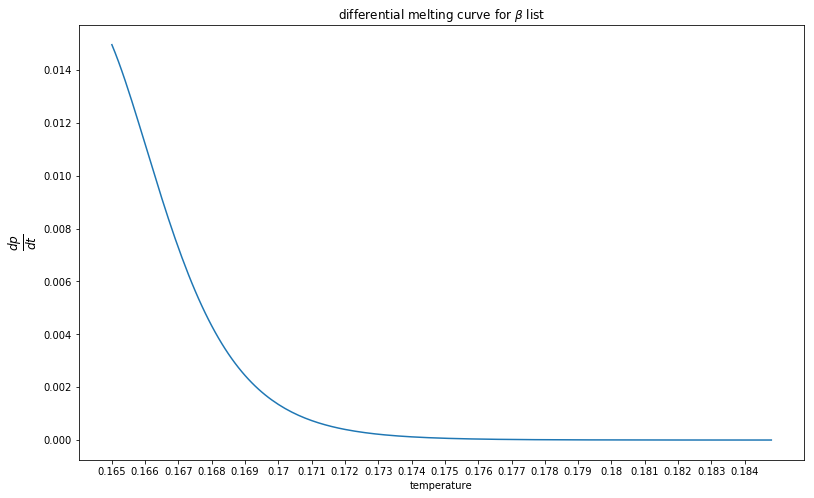

In [8]:
plot.figure(figsize=(13, 8))
diff = np.diff(melting_curve)
plot.plot(-diff)
plot.title('differential melting curve for $\\beta$ list')   
plot.legend(fontsize='large')
plot.xlabel('temperature')
plot.ylabel('$\\frac{dp}{dt}$', fontsize='xx-large')
plot.xticks(range(0, len(temperatures), 10), np.round(temperatures[::10], decimals=3))
plot.show()

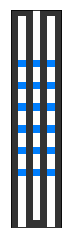

In [9]:
model.visualize(0.1, auto_display=True)